In [1]:
import torch
import matplotlib.pyplot as plt

from BayesianOpt.design import QuasiMCDesign
from BayesianOpt.problem import DTLZ, ZDT

In [2]:
RANDOM_SEED = 47
torch.manual_seed(RANDOM_SEED)

In [3]:
N_DIM = 5
N_OBJ = 2

problem = [
    DTLZ(ndim=N_DIM, nobj=N_OBJ, ordinal=2),
    ZDT(ndim=N_DIM, ordinal=1),
][1]

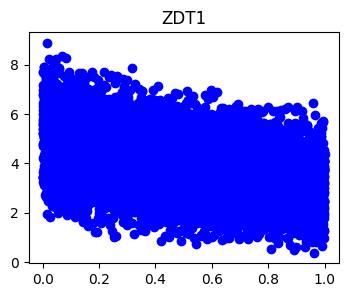

In [4]:
x = QuasiMCDesign(ndim=problem.ndim, lb=problem.lb, ub=problem.ub, random_state=RANDOM_SEED).generate_points(npts=10000)
y = problem.eval(x)

if problem.nobj == 3:
    fig = plt.figure(figsize=(4, 3))
    axes = plt.axes(projection="3d")
    axes.scatter3D(y[:, 0], y[:, 1], y[:, 2], c="b")
    axes.view_init(30, 35)
    axes.set_title(problem.name)
else:
    fig, axes = plt.subplots(1, 1, figsize=(4, 3))
    axes.scatter(y[:, 0].numpy(), y[:, 1].numpy(), c="b")
    axes.set_title(problem.name)

plt.show()